# Introduction to geometric optimization of graphen using Quantum Espresso

---

Contributors: [Seda Oturak](https://github.com/sedaoturak), [Ismaila Dabo](https://scholar.google.com/citations?user=rN299m0AAAAJ&hl=en), [Jessica Wen](https://github.com/JessicaWen-PhD), [Cierra Chandler](https://github.com/Cierra-Chandler), [Henry Eya](https://github.com/Henrynweya)


# Install libraries, environment, and Quantum ESPRESSO

This part installs libraries for numerical calculations and plotting.

In [1]:
# load plotting libraries
import matplotlib.pyplot as plt

# load numerical libraries
import numpy as np

Quantum ESPRESSO is a plane wave code, which uses Fourier transforms to solve equations in plane wave space. This part installs libraries for fast Fourier transforms (FFTs).

In [2]:
# eliminate text output during installation
%%capture

# install mathematical libraries to peform fast Fourier transforms
# (the exclamation mark means that the command is run under Linux)
! apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc

The Atomic Simulation Environment (ASE) is a set of tools for running, visualizing, and analyzing simulations. This part installs ASE.

In [3]:
# eliminate text output during installation
%%capture

# install the Atomic simulation environment
# ! apt install ase
! pip install git+https://gitlab.com/ase/ase

Compiling Quantum ESPRESSO from scratch would take a long time. This part uploads pre-compiled executable files (`.x` extension) and additional files containing the pseudopotentials.

In [4]:
# eliminate text output during installation
%%capture

# navigate to main directory named '/content/'
%cd /content/

# download the pre-compiled files in compressed format (under Linux)
#! wget 'https://docs.google.com/uc?export=download&id=1kw_CJMjP6ggDZXDNp5phAqCPpoe2WXCA' -O qe-lite.tgz
!gdown 'https://drive.google.com/uc?export=download&id=13l-Kiyg-F6aYb5lF8M3RsE1hSnLRdGna' -O qe-lite.tgz

# unpack the compressed files (under Linux)
! tar -xvzf qe-lite.tgz

# clean up some files
! rm -rf sample_data qe-lite.tgz

In [7]:
%cd /content/qe-lite/pseudopotentials/
!wget 'http://pseudopotentials.quantum-espresso.org/upf_files/C.pbe-n-kjpaw_psl.1.0.0.UPF'
!mv C.pbe-n-kjpaw_psl.1.0.0.UPF C.upf

/content/qe-lite/pseudopotentials
--2025-06-10 08:58:47--  http://pseudopotentials.quantum-espresso.org/upf_files/C.pbe-n-kjpaw_psl.1.0.0.UPF
Resolving pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)... 51.77.118.191
Connecting to pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 858332 (838K)
Saving to: ‘C.pbe-n-kjpaw_psl.1.0.0.UPF.1’

C.pbe-n-kjpaw_psl.1 100%[===================>] 838.21K  2.18MB/s    in 0.4s    

2025-06-10 08:58:47 (2.18 MB/s) - ‘C.pbe-n-kjpaw_psl.1.0.0.UPF.1’ saved [858332/858332]



# Prepare Quantum ESPRESSO input file

The calculation is for a unit cell of diamond silicon. The definition of the input parameters of the `pw.x` executable can be found at `www.quantum-espresso.org/Doc/INPUT_PW.html`.

In [14]:
# create calculation folder and navigate into it
%mkdir -p /content/graphene
%cd /content/graphene/

# create input and write it into the file graphene.scf.in
# (documentation can be found at https://www.quantum-espresso.org/Doc/INPUT_PW.html)
qe_input = """
&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  A = 2.47
  C = 7.80
  nat = 2
  ntyp = 1
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 40
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
ATOMIC_POSITIONS (crystal)
C 0.6 0.3 0.5
C 0.3 0.6 0.5
K_POINTS (automatic)
10 10 1 0 0 0
"""


with open("graphene.scf.in", "w") as f:
    f.write(qe_input)

# print the content of the input file (under Linux)
! cat graphene.scf.in

/content/graphene

&CONTROL
  calculation = 'scf'
  restart_mode = 'from_scratch'
  pseudo_dir= '/content/qe-lite/pseudopotentials'
  prefix = 'graphene'
/
&SYSTEM
  ibrav = 4
  A = 2.47
  C = 7.80
  nat = 2
  ntyp = 1
  occupations = 'smearing'
  smearing = 'mv'
  degauss = 0.02
  ecutwfc = 40
/
&ELECTRONS
  mixing_beta = 0.3
  conv_thr = 1.0d-8
/
ATOMIC_SPECIES
C 12.01017 C.upf
ATOMIC_POSITIONS (crystal)
C 0.6 0.3 0.5
C 0.3 0.6 0.5
K_POINTS (automatic)
10 10 1 0 0 0


Use ASE tools to extract information from Quantum ESPRESSO input and visualize the crystal.

# Run Quantum ESPRESSO using input file

In [15]:
# run the pw.x executable using si.scf.in to create si.scf.out
! /content/qe-lite/bin/pw.x < graphene.scf.in > graphene.scf.out

# print the content of the output file (under Linux)
! cat graphene.scf.out


     Program PWSCF v.7.4 starts on 10Jun2025 at  9: 5:22 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     8141 MiB available memory on the printing compute node when the environment starts

     Waiting for input...
     Reading input from standard input

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file C.upf: wavefunction(s)  2S 2P renormalized



In [ ]:
# first method: extract total energies in rydberg during the self-consistent-field calculation (under Linux)
! grep -e "total energy  " -e "estimated" si.scf.out

     total energy              =     -22.83563325 Ry
     estimated scf accuracy    <       0.05556388 Ry
     total energy              =     -22.83753390 Ry
     estimated scf accuracy    <       0.00286635 Ry
     total energy              =     -22.83836546 Ry
     estimated scf accuracy    <       0.00011747 Ry
     total energy              =     -22.83843223 Ry
     estimated scf accuracy    <       0.00001883 Ry
     total energy              =     -22.83843847 Ry
     estimated scf accuracy    <       0.00000041 Ry
     total energy              =     -22.83843893 Ry
     estimated scf accuracy    <       0.00000013 Ry
!    total energy              =     -22.83843896 Ry
     estimated scf accuracy    <          7.5E-09 Ry


In [ ]:
# define physical constants for unit conversion
from scipy.constants import physical_constants
ha_in_ev = physical_constants["Hartree energy in eV"][0]
ry_in_ev = ha_in_ev / 2.

# second method: extract total energy at the end of the self-consistent calculation (using ASE)
output = ase.io.read("/content/silicon/si.scf.out")
total_energy = output.get_total_energy()
print("Energy = %.8f Ry " % total_energy)
print("Energy = %.8f eV " % ( total_energy / ry_in_ev ) )

Energy = -310.73276472 Ry 
Energy = -22.83843696 eV 


# Convergence test with respect to the cutoff energy


In [ ]:
# create a list for cutoff energies to be tested
cutoff_energies = np.arange(12,44,4)

# find the "cutoff energy" line in the input file
wfc_index = qe_input.find('ecutwfc = ') + 10
rho_index = qe_input.find('ecutrho = ') + 10

total_energies = [[],[],[]]
for (n, cutoff_ratio) in enumerate([4,8,10]):
  for cutoff in cutoff_energies:
    # update the input file with the new cutoff energy
    new_input_file = ( qe_input[:wfc_index] + str(cutoff) + qe_input[wfc_index+4:rho_index]
                     + str(cutoff * cutoff_ratio) + qe_input[rho_index+5:] )

    # overwrite the input file
    with open("si.scf.in", "w") as f:
      f.write(new_input_file)

    ! cat si.scf.in
    ! /content/qe-lite/bin/pw.x  < si.scf.in > si.scf.out # run the DFT input file

    output = ase.io.read("/content/silicon/si.scf.out") # read the output file

    total_energies[n].append(output.get_total_energy()) # record the calculated total energy


&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 12,
  ecutrho = 48,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   4 4 4 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 16,
  ecutrho = 64,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   4 4 4 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  cell

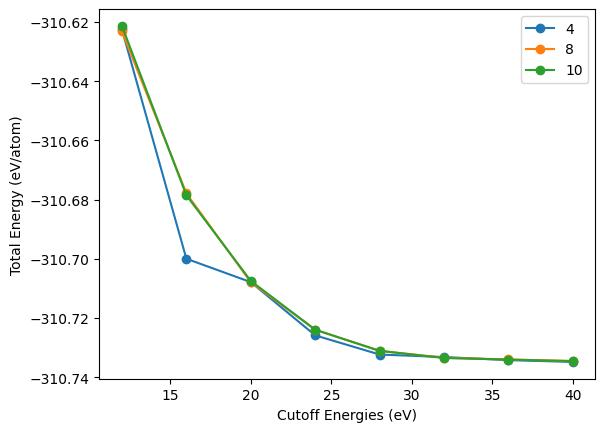

In [ ]:
# plot convergence graph
fig,ax = plt.subplots()
ax.plot(cutoff_energies, np.transpose(total_energies),'o-')
ax.legend(['4','8','10'])
ax.set_xlabel('Cutoff Energies (eV)')
ax.set_ylabel('Total Energy (eV/atom)')
# magnify the y-axis
# plt.ylim([-310.74,-310.72])
plt.show()

# Convergence test with respect to the k-point sampling

In [ ]:
# initialize input file with appropriate cutoffs
qe_input = """
&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   4 4 4 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0
"""

with open("si.scf.in", "w") as f:
    f.write(qe_input)

# print the content of the input file (under Linux)
! cat si.scf.in

# create a list for k points to be tested
kpoints = np.arange(1,9,1) # enter kpoints limits
# find the "k points" line in the input file
lat_cons_index = qe_input.find('K_POINTS') + 20

total_energies = []

for k in kpoints:
  # update the input file with the new k points
  new_input_file = qe_input[:lat_cons_index] + str(k).ljust(2) + str(k).ljust(2) + str(k).ljust(2) + qe_input[lat_cons_index+8:]

  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! cat si.scf.in
  ! /content/qe-lite/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy


&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   4 4 4 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
 1 1 1 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0

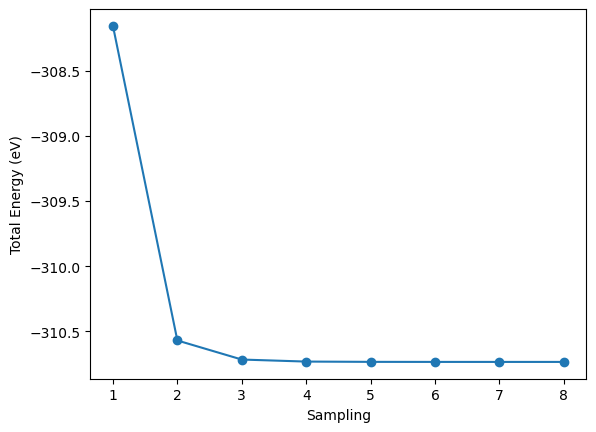

In [ ]:
# plot convergence graph
fig,ax = plt.subplots()
ax.plot(kpoints, total_energies,'o-')
ax.set_xlabel('Sampling')
ax.set_ylabel('Total Energy (eV)')
# magnify the y-axis
# plt.ylim([-310.74,-310.73])
plt.show()

# Lattice parameter

In [ ]:
# initialize input file with appropriate cutoffs and k-point sampling
qe_input = """
&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   5 5 5 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0
"""

with open("si.scf.in", "w") as f:
    f.write(qe_input)

# print the content of the input file (under Linux)
! cat si.scf.in

# create a list for lattice constants to be tested
lattice_constants = np.arange(9.5,11.1,0.1)

# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('celldm(1) =') + 11

total_energies = []
for constant in lattice_constants:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + " %.2f" % constant + qe_input[lat_cons_index+5:]

  # overwrite the input file
  with open("si.scf.in", "w") as f:
    f.write(new_input_file)

  ! cat si.scf.in
  ! /content/qe-lite/bin/pw.x  -in si.scf.in > si.scf.out # run the DFT input file

  output = ase.io.read("/content/silicon/si.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy


&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 10.2,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   5 5 5 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav = 0,
  celldm(1) = 9.50,
  nat = 2,
  ntyp = 1,
  ecutwfc = 30.0,
  ecutrho = 240.0,
/
&electrons
  conv_thr = 1e-8,
/
ATOMIC_SPECIES
 Si  28.086  Si.UPF
ATOMIC_POSITIONS alat
 Si 0.00 0.00 0.00
 Si 0.25 0.25 0.25
K_POINTS automatic
   5 5 5 1 1 1
CELL_PARAMETERS
  0.0 0.5 0.5
  0.5 0.0 0.5
  0.5 0.5 0.0

&control
  prefix='silicon',
  pseudo_dir = '/content/qe-lite/pseudopotentials',
  outdir='/content/silicon/'
/
&system
  ibrav =

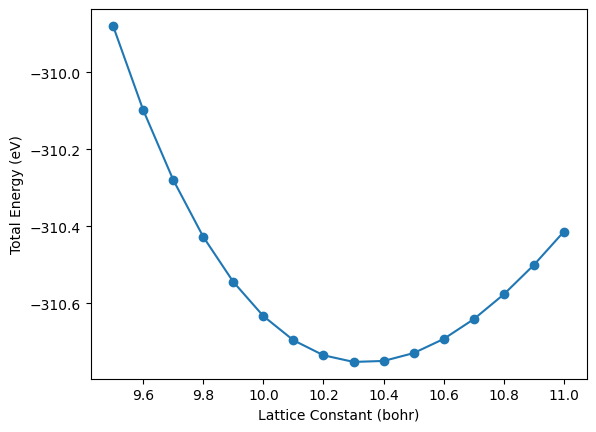

In [ ]:
# plot potential energy curve
fig,ax = plt.subplots()
ax.plot(lattice_constants, total_energies,'o-')
ax.set_xlabel('Lattice Constant (bohr)')
ax.set_ylabel('Total Energy (eV)')
plt.show()